What is the most common way of payments?* Discover the way payments are executed in each borough and visualize the number of payments for any possible means. Then run the [*Chi-squared test*](http://learntech.uwe.ac.uk/da/Default.aspx?pageid=1440) to see whether the method of payment is correlated to the borough. Then, comment the results.

In [1]:
import pandas as pd
import scipy.stats as stat

In [2]:
number_to_payment = {1: "Credit Card",2: "Cash",3: "No Charge", 4: "Dispute",5: "Unknown",6: "Voided Trip"}

In [17]:
df = pd.DataFrame()

payment = []
zoneId = []
df['payment'] = pd.Series()
df['LocationID'] = pd.Series()
buffer = 10000
#, nrows=buffer*100
for month in ['01', '02', '03', '04', '05']:
    for chunk in pd.read_csv("yellow_tripdata_2018-"+month+".csv", chunksize=buffer, nrows=buffer*10, usecols=['payment_type', 'PULocationID']):
            for payment_type in chunk['payment_type']:
                payment.append(number_to_payment[payment_type])
            zoneId += (list(chunk['PULocationID'])) # I have to store the location id of the pickup, concatenating at the end of a list

    df = df.append(pd.DataFrame({'payment': pd.Series(payment),'LocationID':pd.Series(zoneId)}), ignore_index=True)
    payment = []
    zoneId = []


zone_lookup = pd.read_csv("taxi_zone_lookup.csv") # this dataset have a map between the LocationID and Borough
df = df.merge(zone_lookup[['LocationID', 'Borough']], how='inner' ,on='LocationID').fillna("") #Inner join between the interested columns and the previous dataset
df = df[['payment', 'Borough']]

Per ogni quartiere fare un barplot, sulle X ci sta il payment method e sulle Y ci sta la frequenza delle occorrenze

In [18]:
dic = {el:{} for el in set(df['Borough'])}
df2 = pd.DataFrame(columns=[el for el in set(df['Borough'])],  index=[el for el in set(df['payment'])])
for key in dic.keys():
    df2[key] = df.loc[df['Borough'] == key].groupby('payment').count().rename(index=str, columns={'Borough':key})
df2 = df2.T.fillna(0)

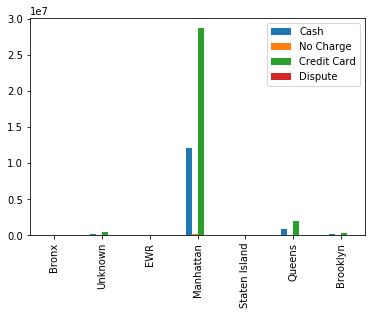

In [19]:
df2.plot(kind='bar')

In [21]:
stat.chi2_contingency(df2)

(62168.01024508471,
 0.0,
 18,
 array([[1.35063864e+04, 2.40010826e+02, 3.17853858e+04, 6.42169570e+01],
        [2.18558428e+05, 3.88382113e+03, 5.14346602e+05, 1.03914968e+03],
        [9.40790491e+02, 1.67180100e+01, 2.21401845e+03, 4.47304710e+00],
        [1.21689683e+07, 2.16244675e+05, 2.86379599e+07, 5.78581192e+04],
        [1.96689196e+02, 3.49520109e+00, 4.62880432e+02, 9.35171056e-01],
        [8.24505409e+05, 1.46516040e+04, 1.94035782e+06, 3.92016242e+03],
        [1.65933996e+05, 2.94867586e+03, 3.90502384e+05, 7.88943541e+02]]))

In [22]:
df2

,Cash,No Charge,Credit Card,Dispute
Bronx,22009,1302,21984,301
Unknown,218658,8971,508173,2026
EWR,473,190,2472,41
Manhattan,12137138,189359,28702118,52416
Staten Island,268,39,347,10
Queens,824387,30958,1920761,7329
Brooklyn,189677,7170,361774,1553


In [23]:
del df